In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix


Throughout these breakouts, we are considering the *Retention modeling at Scholastic Travel Company* case.

# BOR 1

We use here a preprocessed and engineered dataset. The goal now is to proceed with classification and get some practice using the methods seen in class.

In [35]:
stca=pd.read_csv("stca_clean.csv")

In [10]:
stca

,From.Grade,To.Grade,Is.Non.Annual.,Days,Departure.Date,Deposit.Date,Tuition,FRP.Active,FRP.Cancelled,Cancelled.Pax,...,Region_New_Mountain,Region_New_North East,Region_New_Northen California,Region_New_Pacific,Region_New_South Atlantic,Region_New_South Central,Region_New_Southern California,Region_New_Texas,Region_New_West North Central,DepartureSeason_Winter
0,4.0,4.0,0.0,1.0,40557.0,40420.0,424.0,25.0,3.0,3.0,...,0,0,0,0,0,0,1,0,0,1
1,8.0,8.0,0.0,7.0,40557.0,40132.0,2350.0,9.0,9.0,11.0,...,1,0,0,0,0,0,0,0,0,1
2,8.0,8.0,0.0,3.0,40558.0,40466.0,1181.0,17.0,6.0,6.0,...,0,0,0,0,1,0,0,0,0,1
3,6.0,8.0,0.0,6.0,40559.0,40451.0,865.0,40.0,8.0,9.0,...,0,0,0,0,1,0,0,0,0,1
4,10.0,12.0,0.0,4.0,40560.0,40451.0,2025.0,9.0,4.0,3.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,6.0,8.0,0.0,7.0,40721.0,40501.0,2650.0,7.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2131,9.0,12.0,0.0,7.0,40721.0,40515.0,2519.0,6.0,0.0,4.0,...,0,0,0,0,0,0,1,0,0,0
2132,7.0,8.0,0.0,5.0,40722.0,40527.0,1892.0,18.0,4.0,7.0,...,0,0,0,0,0,0,1,0,0,0
2133,8.0,8.0,0.0,5.0,40723.0,40466.0,1699.0,16.0,4.0,4.0,...,0,0,0,0,0,0,1,0,0,0


1. Create the labels `y` and the feature matrix `X` as discussed in class.

In [17]:
y=stca["Retained.in.2012."]

In [18]:
X=stca.drop(columns=["Retained.in.2012."])

2. Separate the data into training/validation/testing with percentages 60/20/20.

In [19]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4)

In [20]:
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5)

## A. Logistic Regression

1. Train the logistic regression model on the training set using `LogisticRegression(max_iter=2000)`. 

In [23]:
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

2. Obtain the predicted probabilites on the validation set.

In [24]:
y_pred_prob=classifier_LR.predict_proba(X_validation)[:,1]

3. Compute the AUC for the Logistic Regression model using `roc_auc_score`. Write the value you find in the spreadsheet.

In [25]:
roc_auc_score(y_validation, y_pred_prob)

0.702095739278955

## B. Classification trees 

1. Train a classification tree on the training set using `max_leaf_nodes=8`.

In [26]:
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 8)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

2. Obtain the predicted probabilites on the validation set.

In [27]:
y_pred_prob=classifier_DT.predict_proba(X_validation)[:,1]

3. Compute the AUC for the Classification Tree model using `roc_auc_score`. Write the value you find in the spreadsheet.

In [28]:
roc_auc_score(y_validation, y_pred_prob)

0.8260282509347736

## C. Random Forest

1. Train a random forest on the training set using `RandomForestClassifier`.

In [29]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

2. Compute the predicted probabilities on the validation set using this model.

In [30]:
y_pred_prob=classifier_RF.predict_proba(X_validation)[:,1]

3. Compute the AUC for the Random Forest model using `roc_auc_score`. Write the value you find in the spreadsheet.

In [31]:
roc_auc_score(y_validation, y_pred_prob)

0.840869224022527

## D. Boosted Trees

1. Train a boosted tree on the training set using `GradientBoostingClassifier`.

In [32]:
classifier_GBM = GradientBoostingClassifier()

classifier_GBM.fit(X_train, y_train)

GradientBoostingClassifier()

2. Compute the predicted probabilities on the validation set using this model.

In [33]:
y_pred_prob=classifier_GBM.predict_proba(X_validation)[:,1]

3. Compute the AUC for the Boosted Tree model using `roc_auc_score`. Write the value you find in the spreadsheet.

In [34]:
roc_auc_score(y_validation, y_pred_prob)

0.8378802566588192

# BOR 2

We are now moving forward with the last steps in the supervised machine learning pipeline.

1. Merge the training and validation sets together.

In [43]:
Xtrain_val=pd.concat([X_train,X_validation])
ytrain_val=pd.concat([y_train, y_validation])

2. Retrain the winning model on the merged set.

In [45]:
classifier_GBM = GradientBoostingClassifier()

classifier_GBM.fit(Xtrain_val, ytrain_val)

GradientBoostingClassifier()

3. Obtain the predicted probabilities on the test set. Using a threshold=0.7 and `np.where`, obtain the predicted classes from the predicted probabilities.

In [46]:
y_pred_prob=classifier_GBM.predict_proba(X_test)[:,1]

In [47]:
threshold=0.7
y_pred=np.where(y_pred_prob>threshold,1,0)

4. Using the predicted classes and the real test set labels, deduce the confusion matrix and the accuracy.

In [48]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[147  22]
 [ 78 180]]
0.765807962529274


5. Using `.features_importance_` on the model as we saw last time, are there any interesting insights you can get?

In [50]:
classifier_GBM.feature_importances_

array([2.89364344e-03, 7.85826459e-03, 1.40137503e-01, 3.67646416e-03,
       2.72963938e-02, 2.31551418e-02, 4.35417655e-02, 2.18290686e-02,
       1.00967908e-02, 1.68872489e-02, 7.06699903e-03, 3.69171479e-02,
       3.27328737e-03, 4.69594322e-03, 1.19903947e-02, 1.90341311e-02,
       9.20806113e-04, 8.68316660e-02, 4.12803765e-03, 3.74296268e-01,
       9.29699276e-03, 0.00000000e+00, 0.00000000e+00, 2.33929323e-03,
       1.29847160e-03, 2.01132978e-03, 1.58024407e-03, 1.13193045e-01,
       1.20157239e-03, 1.40225095e-02, 6.48740745e-04, 0.00000000e+00,
       3.83396469e-04, 1.72886548e-04, 0.00000000e+00, 1.43884719e-03,
       3.16361516e-03, 2.20033007e-04, 2.50104722e-03, 1.00949604e-06,
       0.00000000e+00, 0.00000000e+00])

<AxesSubplot:xlabel='Feature Importance'>

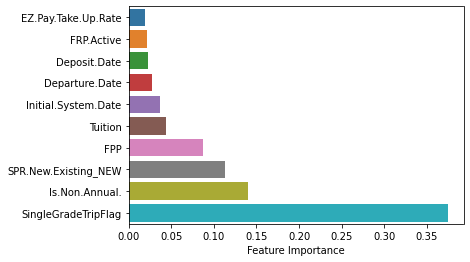

In [52]:
import seaborn as sns
df=pd.DataFrame(index=X_train.columns)
df["Feature Importance"]=classifier_GBM.feature_importances_
df_sorted=df.sort_values(by="Feature Importance")
sns.barplot(data=df_sorted[-10:],x="Feature Importance", y=df_sorted[-10:].index)